In [1]:
import numpy as np
import pandas as pd
import os

#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
#%config InlineBackend.figure_format = notebook_screen_res

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.5.0


[]

tf.Tensor(
[5. 2. 7. 2. 1. 4. 1. 5. 3. 5. 2. 4. 5. 2. 2. 2. 1. 5. 4. 3. 4. 3. 4. 3.
 1. 0. 4. 4. 8. 2. 5. 3. 2. 3. 4. 2. 5. 4. 2. 4. 4. 0. 5. 3. 7. 2. 5. 4.
 4. 2.], shape=(50,), dtype=float32)
度数分布 [ 2  4 12  7  0 13  9  0  2  1]
分散 2.9104002
標準偏差 1.7059895
   count  mean      std  min  25%  50%  75%  max
0   50.0  3.36  1.72331  0.0  2.0  3.5  4.0  8.0


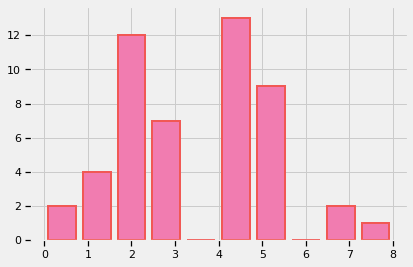

In [2]:
dist = tfd.Poisson(rate=3.5)
samples = dist.sample(50)
print(samples)

# 度数分布
hist, bin_edges = np.histogram(samples)
print("度数分布", hist)

# var
print("分散", np.var(samples))

# std
print("標準偏差", np.std(samples))

# summary
df = pd.DataFrame(samples)
print(df.describe().transpose())

# histgram
plt.hist(samples.numpy(), rwidth=.8, color=TFColor[4], edgecolor=TFColor[0], linewidth=2.0)
plt.show()

[0 1 2 3 4 5 6 7 8 9]
tf.Tensor(
[0.02843883 0.10124223 0.18021117 0.21385056 0.190327   0.13551283
 0.08040424 0.04089131 0.01819664 0.00719778], shape=(10,), dtype=float32)


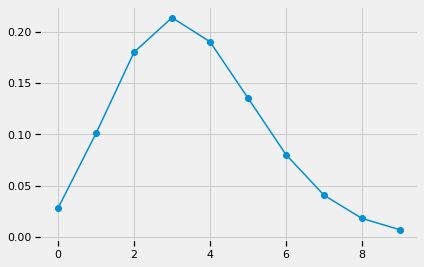

In [3]:
mean = 3.56
space = np.arange(10)
print(space)
probs = tfd.Poisson(rate=mean).prob(space)
print(probs)
plt.plot(space, probs, "o-")
plt.show()

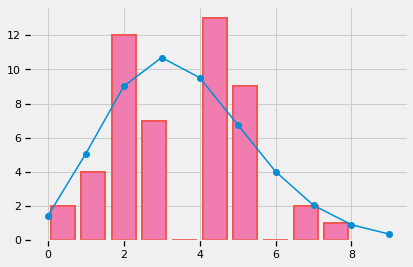

In [4]:
plt.hist(samples.numpy(), rwidth=.8, color=TFColor[4], edgecolor=TFColor[0], linewidth=2.0)
plt.plot(space, probs * 50, "o-")
plt.show()

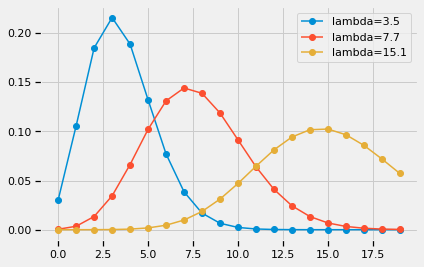

In [5]:
means = [3.5, 7.7, 15.1]
space20 = np.arange(20)
plt.plot(space20, tfd.Poisson(rate=means[0]).prob(space20), "o-", label="lambda=%.1f" %means[0])
plt.plot(space20, tfd.Poisson(rate=means[1]).prob(space20), "o-", label="lambda=%.1f" %means[1])
plt.plot(space20, tfd.Poisson(rate=means[2]).prob(space20), "o-", label="lambda=%.1f" %means[2])
plt.legend()
plt.show()

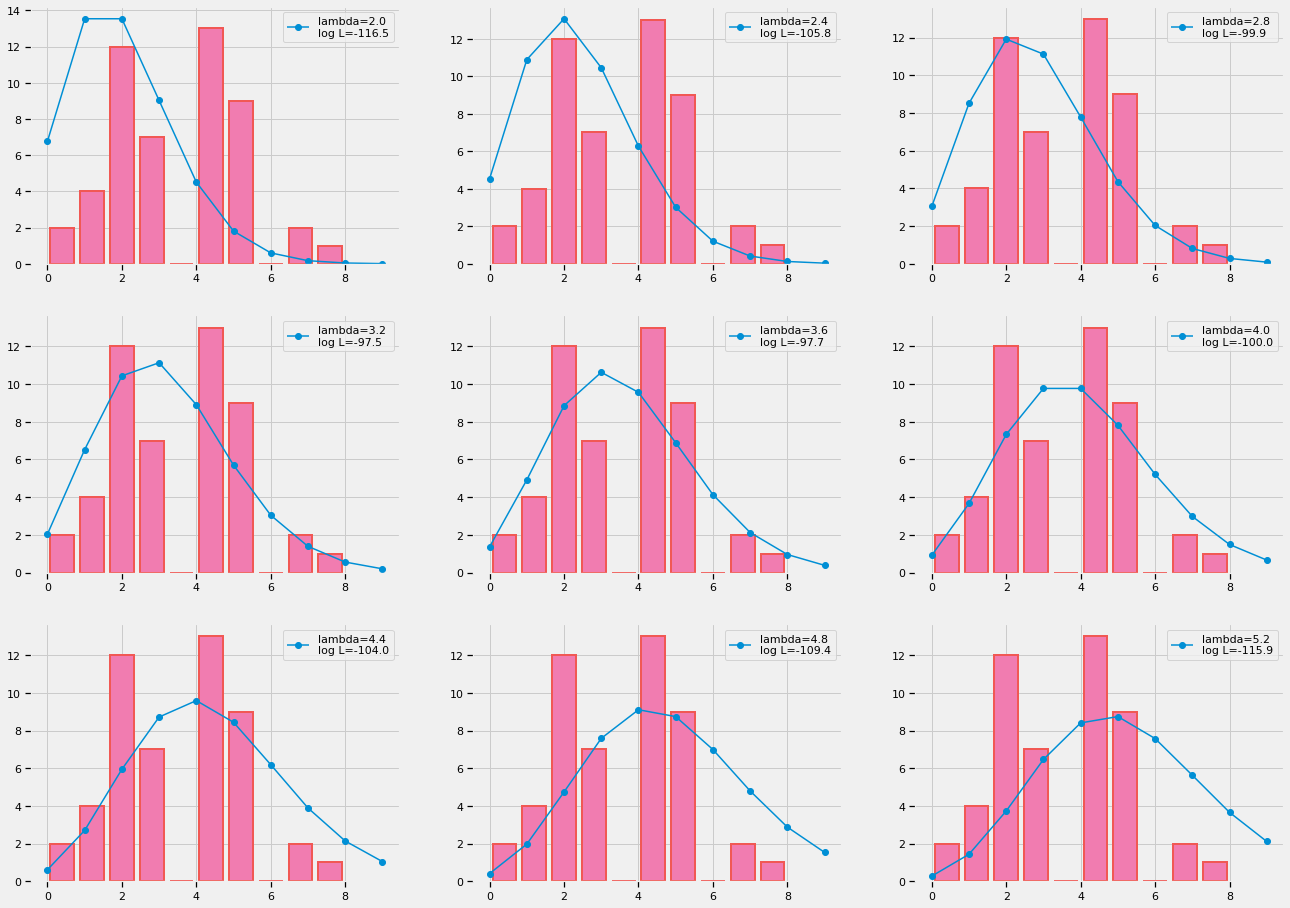

In [6]:
loglik = lambda y, p_y: p_y.log_prob(y)

means = [2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]

idx = 0
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for row in axes:
    for cell in row:
        mean = means[idx]
        dist = tfd.Poisson(rate=mean)
        probs = dist.prob(space)
        logl = tf.reduce_sum(dist.log_prob(samples)) # log(L(θ|Y)) = sigma(log(p(Y=samples|θ=mean)))
        cell.hist(samples.numpy(), rwidth=.8, color=TFColor[4], edgecolor=TFColor[0], linewidth=2.0)
        cell.plot(space, probs * 50, "o-", label="lambda=%.1f \nlog L=%.1f" %(mean, logl))
        cell.legend()
        idx += 1
plt.show()

# dist = tfd.Poisson(rate=means)
# probs = dist.prob(space)
# logl = tf.reduce_sum(dist.log_prob(samples))
# plt.hist(samples.numpy(), rwidth=.8, color=TFColor[4], edgecolor=TFColor[0], linewidth=2.0)
# plt.plot(space, probs * 50, "o-", label="lambda=%.1f \nlog L=%.1f" %(means, logl))
# plt.legend()
# plt.show()

# Maximum likelihood estimation

https://www.tensorflow.org/probability/examples/Optimizers_in_TensorFlow_Probability

https://thelongrun.blog/2019/11/24/maximum-likelihood-with-tensorflow-2-0/


https://rlhick.people.wm.edu/posts/custom-likes-tensorflow.html

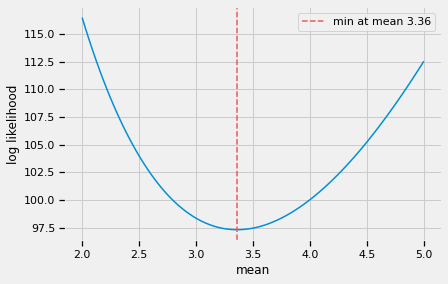

In [7]:
means = np.linspace(2., 5., 100, dtype=np.float32)
logls = []
for mean in means:
    dist = tfd.Poisson(rate=mean)
    logl = -tf.reduce_sum(dist.log_prob(samples))
    logls.append(logl)
plt.plot(means, logls)
plt.axvline(x=np.mean(samples), color=TFColor[0], linestyle="--", label="min at mean %.2f" %(np.mean(samples)))
plt.legend()
plt.xlabel("mean")
plt.ylabel("log likelihood")
plt.show()

In [8]:
import contextlib
import functools
import time

@contextlib.contextmanager
def timed_execution():
  t0 = time.time()
  yield
  dt = time.time() - t0
  print('Evaluation took: %f seconds' % dt)

def make_val_and_grad_fn(value_fn):
  @functools.wraps(value_fn)
  def val_and_grad(x):
    return tfp.math.value_and_gradient(value_fn, x)
  return val_and_grad

def np_value(tensor):
  """Get numpy value out of possibly nested tuple of tensors."""
  if isinstance(tensor, tuple):
    return type(tensor)(*(np_value(t) for t in tensor))
  else:
    return tensor.numpy()

def run(optimizer):
  """Run an optimizer and measure it's evaluation time."""
  optimizer()  # Warmup.
  with timed_execution():
    result = optimizer()
  return np_value(result)

In [9]:
@make_val_and_grad_fn
def logl(x):
    dist = tfd.Poisson(rate=x)
    logl = -tf.reduce_sum(dist.log_prob(samples))
    return logl

start = np.random.default_rng().uniform(1.0, 2.0, 1)
tolerance = 1e-10

@tf.function
def logl_with_lbfgs():
    return tfp.optimizer.lbfgs_minimize(
        logl,
        initial_position=tf.constant(start, dtype=tf.float32),
        tolerance=tf.constant(tolerance, dtype=tf.float32)
    )
results = run(logl_with_lbfgs)

print('L-BFGS Results')
print("From:", start[0])
print('Converged:', results.converged)
print('Location of the minimum:', results.position)
print('Number of iterations:', results.num_iterations)

Evaluation took: 0.020703 seconds
L-BFGS Results
From: 1.8504747063267057
Converged: True
Location of the minimum: [3.3600001]
Number of iterations: 5


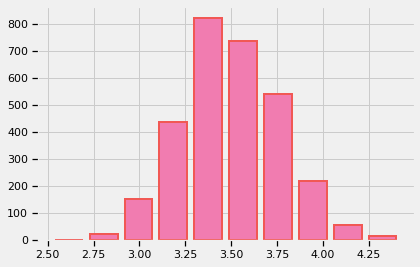

In [10]:
dist = tfd.Poisson(rate=3.5)
means = []
for i in range(3000):
    samples = dist.sample(50)
    means.append(np.mean(samples))
    print('Downloading File FooFile.txt [%d%%]\r'%i, end="")

plt.hist(means, rwidth=.8, color=TFColor[4], edgecolor=TFColor[0], linewidth=2.0)
plt.show()

In [ ]:
dist = tfd.Poisson(rate=3.5)
samples = dist.sample(50)